# LeetCode

### 733. Flood Fill

https://leetcode.com/problems/flood-fill/?envType=study-plan&id=algorithm-i


**Description**


    An image is represented by an m x n integer grid image where image[i][j] represents the pixel value of the image.

    You are also given three integers sr, sc, and color. You should perform a flood fill on the image starting from the pixel image[sr][sc].

    To perform a flood fill, consider the starting pixel, plus any pixels connected 4-directionally to the starting pixel of the same color as the starting pixel, plus any pixels connected 4-directionally to those pixels (also with the same color), and so on. Replace the color of all of the aforementioned pixels with color.

    Return the modified image after performing the flood fill.
    
    
**Examples**

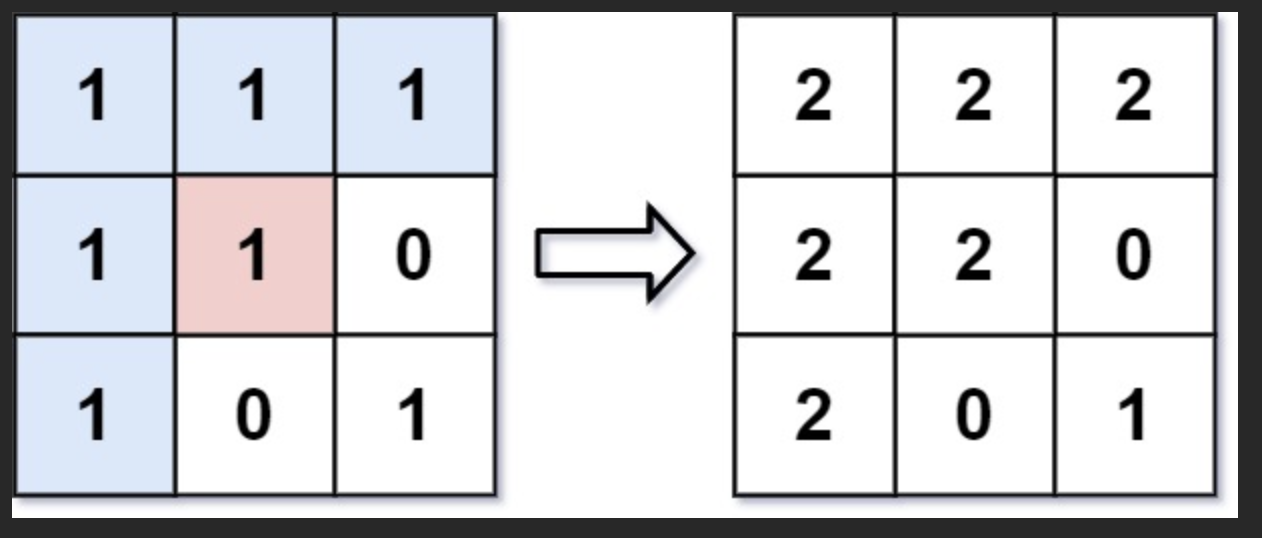

    Input: image = [[1,1,1],[1,1,0],[1,0,1]], sr = 1, sc = 1, color = 2
    Output: [[2,2,2],[2,2,0],[2,0,1]]
    Explanation: From the center of the image with position (sr, sc) = (1, 1) (i.e., the red pixel), all pixels connected by a path of the same color as the starting pixel (i.e., the blue pixels) are colored with the new color.
    Note the bottom corner is not colored 2, because it is not 4-directionally connected to the starting pixel.
    
    Example 2:
    Input: image = [[0,0,0],[0,0,0]], sr = 0, sc = 0, color = 0
    Output: [[0,0,0],[0,0,0]]
    Explanation: The starting pixel is already colored 0, so no changes are made to the image.
    
    
**Constraints**

    m == image.length
    n == image[i].length
    1 <= m, n <= 50
    0 <= image[i][j], color < 2^16
    0 <= sr < m
    0 <= sc < n


In [44]:
from collections import deque

class Solution:
    def floodFill(self, image: list[list[int]], sr: int, sc: int, color: int):
        if image[sr][sc]==color:
            return image
        
        startColor = image[sr][sc]
        n,m = len(image[0]), len(image)
        queue = deque()
        queue.append((sr,sc))
        
        while queue:
            qx, qy = queue.popleft()
            image[qx][qy] = color
            
            for nx, ny in ([qx+1,qy], [qx-1, qy], [qx,qy+1], [qx,qy-1]):
                if 0<=nx<n and 0<=ny<m and image[nx][ny]==startColor:
                    queue.append((nx,ny))
        
        return image

In [45]:
sol = Solution()
print(sol.floodFill([[1,1,1],[1,1,0],[1,0,1]],1,1,2))
print(sol.floodFill([[0,0,0],[0,0,0]],0,0,0))

[[2, 2, 2], [2, 2, 0], [2, 0, 1]]
[[0, 0, 0], [0, 0, 0]]


In [28]:
from collections import deque

# image, sr, sc, color = [[1,1,1],[1,1,0],[1,0,1]],1,1,2
image, sr, sc, color = [[0,0,0],[0,0,0]],0,0,0

startColor = image[sr][sc]
n,m = len(image[0]), len(image)

if startColor != color:
    queue = deque()
    queue.append((sr,sc))
    
    while queue:
        x, y = queue.popleft()
        image[x][y] = color
        
        for nx, ny in [(x+1, y), (x-1,y), (x,y+1), (x,y-1)]:
            if 0<=nx<n and 0<=ny<m and image[nx][ny]==startColor:
                queue.append((nx,ny))
                
image

[[0, 0, 0], [0, 0, 0]]

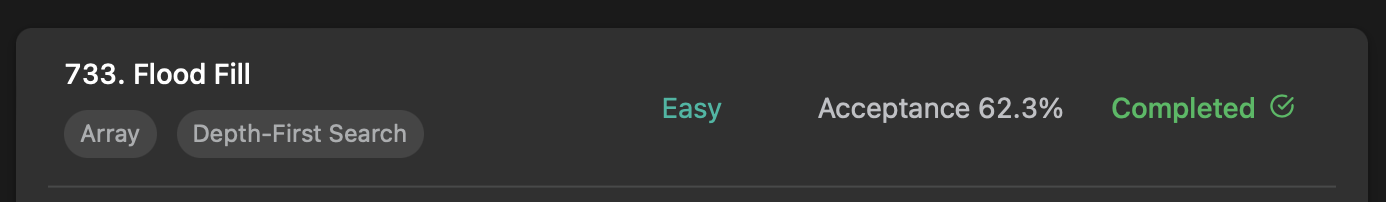

# LeetCode

### 695. Max Area of Island



**Description**

    You are given an m x n binary matrix grid. An island is a group of 1's (representing land) connected 4-directionally (horizontal or vertical.) You may assume all four edges of the grid are surrounded by water.

    The area of an island is the number of cells with a value 1 in the island.

    Return the maximum area of an island in grid. If there is no island, return 0.


**Examples**

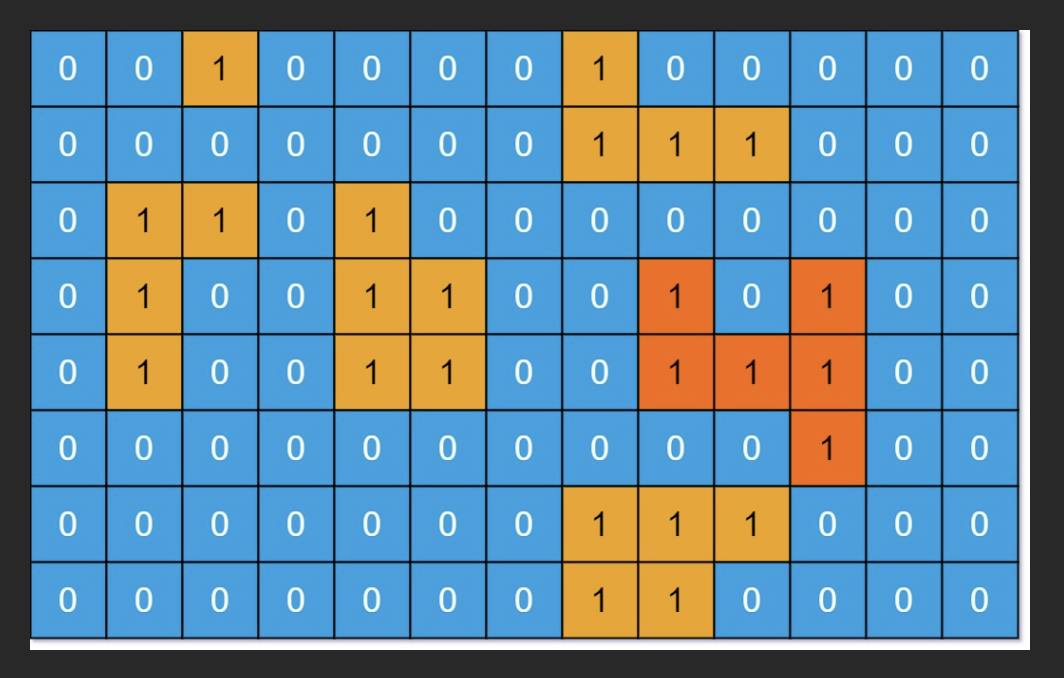

    Input: grid = [[0,0,1,0,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,0,0,1,1,1,0,0,0],[0,1,1,0,1,0,0,0,0,0,0,0,0],[0,1,0,0,1,1,0,0,1,0,1,0,0],[0,1,0,0,1,1,0,0,1,1,1,0,0],[0,0,0,0,0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,0,1,1,1,0,0,0],[0,0,0,0,0,0,0,1,1,0,0,0,0]]
    Output: 6
    Explanation: The answer is not 11, because the island must be connected 4-directionally.
    
    Example 2:
    Input: grid = [[0,0,0,0,0,0,0,0]]
    Output: 0
    
**Constraints**

    m == grid.length
    n == grid[i].length
    1 <= m, n <= 50
    grid[i][j] is either 0 or 1.
     



In [4]:
class Solution:
    def maxAreaOfIsland(self, grid: list[list[int]]):
        return None

In [55]:
from collections import deque

class Solution:
    dx=[-1,0,1,0]
    dy=[0,1,0,-1]
    def maxAreaOfIsland(self, grid):
        def BFS(i,j,row,col,grid,visited):
            cnt = 1
            queue = deque()
            queue.append([i,j])
            visted[i][j] = 1
            while queue : 
                x,y = queue.popleft()
                for i in range(4):
                    nx,ny = x+dx[i], y+dy[i]
                    if 0<=nx<row and 0<=ny<col and grid[nx][ny] == 1 and not visted[nx][ny]:
                        visited[nx][ny] = 1
                        queue.append([nx,ny])
                        cnt+=1
            return cnt
        row,col,answer = len(grid), len(grid[0]),0 
        visted = [[0]*col for i in range(row)]
        
        for i in range(row) : 
            for j in range(col):
                if grid[i][j] == 1 and visted[i][j] ==0:
                    answer = max(answer,BFS(i,j,row,col,grid,visted))
        return answer

In [57]:
sol = Solution()
print(sol.maxAreaOfIsland([[0,0,1,0,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,0,0,1,1,1,0,0,0],[0,1,1,0,1,0,0,0,0,0,0,0,0],[0,1,0,0,1,1,0,0,1,0,1,0,0],[0,1,0,0,1,1,0,0,1,1,1,0,0],[0,0,0,0,0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,0,1,1,1,0,0,0],[0,0,0,0,0,0,0,1,1,0,0,0,0]]
))
print(sol.maxAreaOfIsland([[0,0,0,0,0,0,0,0]]))

6
0


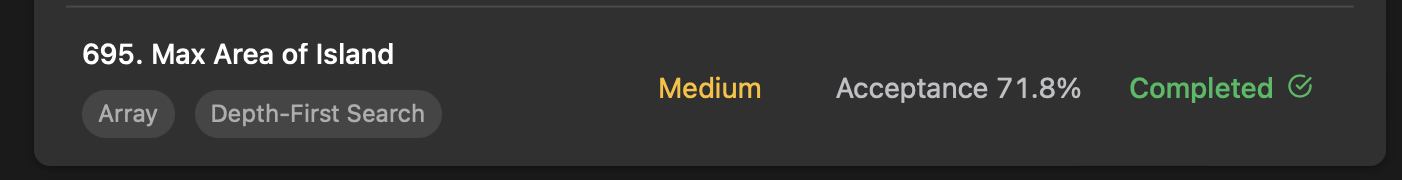